In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import preprocessing
bodyfat = pd.read_csv("/Users/gabri/Classes/MachineLearning2026/data/bodyfat.csv")
X = bodyfat.drop(columns=["BodyFat","Density"])
y = bodyfat["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.2,
random_state = 10
)
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_fold = np.zeros(len(y_train)).astype(int)
for i, (_, fold_indexes) in enumerate(kf.split(X_train)):
    cv_fold[fold_indexes] = int(i)

Seja o MSk o modelo de regressão linear treinado no conjunto de treino com k preditores obtidos via algum método de seleção S através da maximização do R2 dentre as possíveis escolhas de subconjuntos de k preditores. Utilize o conjunto de treino para obter MSk para cada número possível de preditores k entre 1 e 13, e os métodos de seleção S dentre best subset selection, forward stepwise selection e backward stepwise selection

In [2]:
from itertools import combinations
from tqdm import tqdm

def best_subset_selection(X, y):

    cols = list(X.columns)
    p = len(cols)


    results = {}

    models = {}

    for k in tqdm(range(1, p+1)):
    
        best_r2 = -np.inf

        best_subset = None

        best_model = None

        for subset in (combinations(cols,k)):

            test_subset = list(subset)

            X_sub = sm.add_constant(X[test_subset])
            model = sm.OLS(y, X_sub).fit()

    
            r2 = model.rsquared

            if r2 > best_r2:

                best_r2 = r2

                best_subset = test_subset

                best_model = model

        results[k] = {
            'subset': best_subset,
            'r2': best_r2
        }

        models[k] = best_model

      #  print(best_subset)

    #print(results) 
    
    
    return results, models


teste, models_teste = best_subset_selection(X_train, y_train)

100%|██████████| 13/13 [00:08<00:00,  1.54it/s]


In [3]:
def forward_selection(X, y):

    cols = list(X.columns)
    p = len(cols)

    results = {}

    selected = []

    models = {}

    for k in tqdm(range(1,p+1)):

        best_r2 = -np.inf

        best_subset = None

        best_model = None

        for col in cols:
            
            if col not in selected:

                subset = selected + [col]

                X_sub = sm.add_constant(X[subset])

                model = sm.OLS(y, X_sub).fit()

                r2 = model.rsquared

                if r2 > best_r2:

                    best_r2 = r2

                    best_subset = subset

                    best_model = model

        selected = best_subset

        #print(selected)
        results[k] = {
            'subset': selected,
            'r2': best_r2
        }

        models[k] = best_model
    #print(results)

    return results, models

teste, models_test = forward_selection(X_train, y_train)

        


100%|██████████| 13/13 [00:00<00:00, 149.06it/s]


In [4]:
def backward_selection(X, y):

    cols = list(X.columns)

    p = len(cols)

    results = {}

    selected = cols

    removed = []

    models = {}

    for k in tqdm(range(p, 0, -1)):

        if k == 13:
            
            X_sub = sm.add_constant(X)
            model = sm.OLS(y, X_sub).fit()
            r2 = model.rsquared
            print(r2)
            results[k] = {
                'subset': cols.copy(),
                'r2': r2
            }

            models[k] = model

        else:

            best_r2 = -np.inf

            feature_to_drop = None

            best_model = None

            for col in cols:

                trial = selected.copy()

                trial.remove(col)

                X_sub = sm.add_constant(X[trial])

                model = sm.OLS(y, X_sub).fit()

                r2 = model.rsquared

                if r2 > best_r2:

                    best_r2 = r2

                    feature_to_drop = col

                    best_model = model

            selected.remove(feature_to_drop)

            #print(len(selected))

            #print(selected)

            results[k] = {
                'subset': selected.copy(),
                'r2': best_r2
            }

            models[k] = best_model

            #print(results)


    return results, models

teste, models_test = backward_selection(X_train, y_train)

100%|██████████| 13/13 [00:00<00:00, 122.52it/s]

0.735423471848239


In [5]:
models = {
    'Best Subset Selection': best_subset_selection(X=X_train, y=y_train),
    'Foward Stepwise Selection': forward_selection(X=X_train, y=y_train),
    'Backward Stepwise Selection': backward_selection(X=X_train, y=y_train),

}

models

100%|██████████| 13/13 [00:00<00:00, 95.31it/s]

0.735423471848239


{'Best Subset Selection': ({1: {'subset': ['Abdomen'],
    'r2': np.float64(0.6404157973526721)},
   2: {'subset': ['Weight', 'Abdomen'], 'r2': np.float64(0.693716876511187)},
   3: {'subset': ['Weight', 'Abdomen', 'Wrist'],
    'r2': np.float64(0.7100124087139327)},
   4: {'subset': ['Weight', 'Abdomen', 'Biceps', 'Wrist'],
    'r2': np.float64(0.7192801308495235)},
   5: {'subset': ['Weight', 'Abdomen', 'Biceps', 'Forearm', 'Wrist'],
    'r2': np.float64(0.7231554582194162)},
   6: {'subset': ['Weight', 'Neck', 'Abdomen', 'Biceps', 'Forearm', 'Wrist'],
    'r2': np.float64(0.7263015578363177)},
   7: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen',
     'Thigh',
     'Forearm',
     'Wrist'],
    'r2': np.float64(0.7287047610965436)},
   8: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen',
     'Thigh',
     'Biceps',
     'Forearm',
     'Wrist'],
    'r2': np.float64(0.7316170437252492)},
   9: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen'

In [6]:
col_order = {c: i for i, c in enumerate(X_train.columns)}

for k in range(1, len(X_train.columns) + 1):
    print(f"-------------- k = {k} --------------")

    for model in models.keys():
        subset = models[model][k]["subset"]             
        subset_sorted = sorted(subset, key=col_order.get)

        print(f"Algoritmo : {model}")
        print(f"Subset escolhido: {subset_sorted}")
        print(f"Valor de R^2: {models[model][k]['r2']}\n")


-------------- k = 1 --------------


KeyError: 'subset'

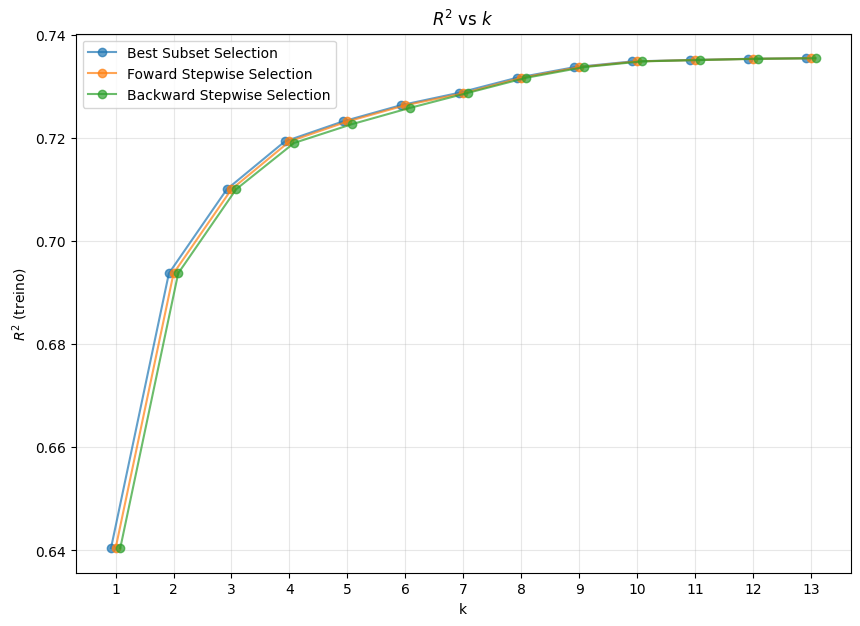

In [ ]:
ks = np.arange(1, len(X_train.columns) + 1)

plt.figure(figsize=(10, 7))

models_list = list(models.keys())
offsets = np.linspace(-0.08, 0.08, len(models_list)) 

for model, off in zip(models_list, offsets):
    r2s = [models[model][k]["r2"] for k in ks]
    plt.plot(ks + off, r2s, marker="o", label=model, alpha=0.7)

plt.xlabel("k")
plt.ylabel(r"$R^2$ (treino)")
plt.title(r"$R^2$ vs $k$")
plt.xticks(ks)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [ ]:
alphas = 10**np.linspace(5,-2,100)

Faça um gráfico mostrando no eixo y o MSE estimado para o lasso via validação cruzada, com a separação em subconjuntos gerada no início do exercício, e no eixo x o parâmetro α usado dentre a malha de valores gerada acima. Obtenha α∗ o valor de α que atinge o menor valor do MSE estimado via validação cruzada. Denotaremos por Mlasso o modelo de lasso ajustado em todo o conjunto de treino com α = α∗.

In [8]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import preprocessing
bodyfat = pd.read_csv("/Users/gabri/Classes/MachineLearning2026/data/bodyfat.csv")
X = bodyfat.drop(columns=["BodyFat","Density"])
y = bodyfat["BodyFat"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_fold = np.zeros(len(y_train)).astype(int)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   2   3   4   5   7   8   9  11  12  13  14  15  16  17  18  20  21
  22  23  25  27  28  29  30  31  32  33  34  36  37  38  39  40  41  42
  43  44  45  46  47  48  50  51  52  53  54  57  62  64  65  66  67  68
  69  70  71  72  73  74  75  77  78  79  81  82  83  84  85  86  88  89
  90  91  92  93  94  95  96  97  99 100 101 102 103 104 105 107 108 110
 112 113 115 116 117 118 121 122 123 124 125 126 127 128 129 130 132 133
 134 135 136 137 138 139 140 141 142 143 145 146 147 149 150 151 153 155
 156 157 158 159 160 161 162 163 164 165 166 169 170 171 172 173 174 175
 176 177 178 179 180 182 185 186 187 189 191 193 194 196 197 198 199 200
 202 204 206 207 208 209 210 213 214 215 216 217 218 220 221 222 223 224
 225 226 227 228 229 230 231 233 234 235 237 238 239 240 241 244 246 247
 248 249 251]
  Test:  index=[  1   6  10  19  24  26  35  49  55  56  58  59  60  61  63  76  80  87
  98 106 109 111 114 119 120 131 144 148 152 154 167 168 181 183 184 188

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

alphas = 10**np.linspace(5, -2, 100)

mse_per_alpha = []

for a in alphas:
    mse_per_fold = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):

        X_train_fold = X.iloc[train_index]
        y_train_fold = y.iloc[train_index]

        X_test_fold = X.iloc[test_index]
        y_test_fold = y.iloc[test_index]

        scaler = StandardScaler()
        X_train_fold_sc = scaler.fit_transform(X_train_fold)
        X_test_fold_sc  = scaler.fit_transform(X_test_fold)

        model = Lasso(alpha=a, max_iter=100000)
        model.fit(X_train_fold_sc, y_train_fold)

        y_pred = model.predict(X_test_fold_sc)
        mse = mean_squared_error(y_test_fold, y_pred)

        mse_per_fold.append(mse)

    mse_per_alpha.append(np.mean(mse_per_fold))


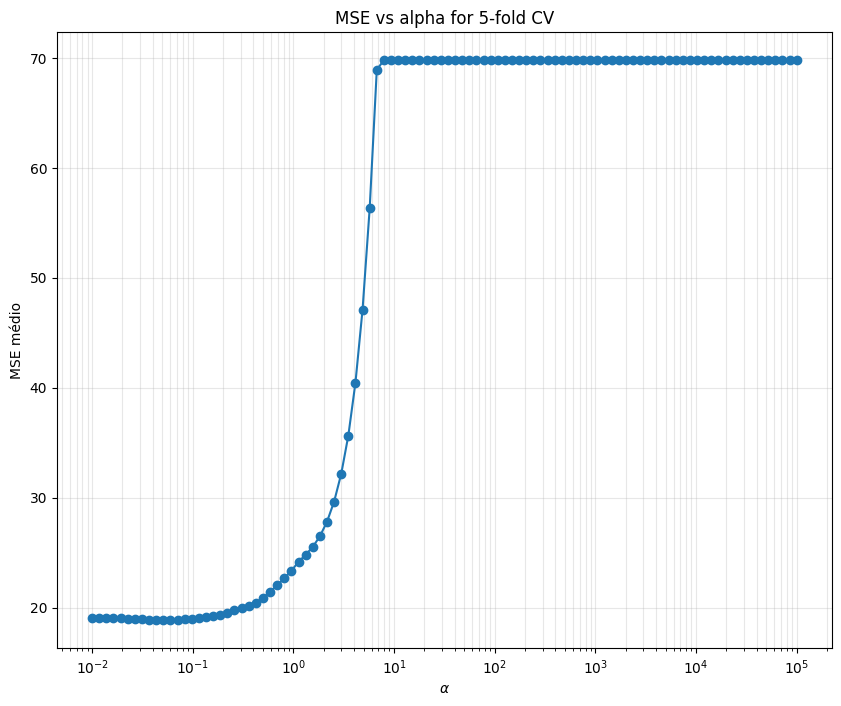

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title("MSE vs alpha for 5-fold CV")

plt.plot(alphas, mse_per_alpha, marker="o")

plt.xscale("log") 
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE médio")
plt.grid(True, which="both", alpha=0.3)

plt.show()


In [11]:
min_mse = np.min(mse_per_alpha)
min_mse_index = mse_per_alpha.index(min_mse)
min_alpha = alphas[min_mse_index]

In [12]:
min_mse

np.float64(18.858386328448656)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
best_lasso = Lasso(alpha=min_alpha)
best_lasso_model = best_lasso.fit(X=X_train_scaled, y=y_train)

In [27]:
models = {
    'Best Subset Selection': (best_subset_selection(X=X_train, y=y_train)[0],best_subset_selection(X=X_train, y=y_train)[1]),
    'Foward Stepwise Selection': (forward_selection(X=X_train, y=y_train)[0],forward_selection(X=X_train, y=y_train)[1]),
    'Backward Stepwise Selection': (backward_selection(X=X_train, y=y_train)[0],backward_selection(X=X_train, y=y_train)[1]),
    'Lasso': best_lasso_model
}

models

100%|██████████| 13/13 [00:00<00:00, 128.78it/s]


0.735423471848239


  0%|          | 0/13 [00:00<?, ?it/s]

0.735423471848239


100%|██████████| 13/13 [00:00<00:00, 121.57it/s]


{'Best Subset Selection': ({1: {'subset': ['Abdomen'],
    'r2': np.float64(0.6404157973526721)},
   2: {'subset': ['Weight', 'Abdomen'], 'r2': np.float64(0.693716876511187)},
   3: {'subset': ['Weight', 'Abdomen', 'Wrist'],
    'r2': np.float64(0.7100124087139327)},
   4: {'subset': ['Weight', 'Abdomen', 'Biceps', 'Wrist'],
    'r2': np.float64(0.7192801308495235)},
   5: {'subset': ['Weight', 'Abdomen', 'Biceps', 'Forearm', 'Wrist'],
    'r2': np.float64(0.7231554582194162)},
   6: {'subset': ['Weight', 'Neck', 'Abdomen', 'Biceps', 'Forearm', 'Wrist'],
    'r2': np.float64(0.7263015578363177)},
   7: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen',
     'Thigh',
     'Forearm',
     'Wrist'],
    'r2': np.float64(0.7287047610965436)},
   8: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen',
     'Thigh',
     'Biceps',
     'Forearm',
     'Wrist'],
    'r2': np.float64(0.7316170437252492)},
   9: {'subset': ['Age',
     'Weight',
     'Neck',
     'Abdomen'

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm

mse_test_set = {}
min_mse = np.inf
model_min_mse = None

for method in models.keys():
    if method == 'Lasso':

        scaler = StandardScaler()
        scaler.fit(X_train)

        X_test_scaled = scaler.fit_transform(X_test)

        X_test_scaled = pd.DataFrame(
            X_test_scaled,
            columns=X_test.columns,
            index=X_test.index
        )

        y_pred = models[method].predict(X_test_scaled)
        mse_test_set[method] = mean_squared_error(y_test, y_pred)

        if mean_squared_error(y_test, y_pred) < min_mse:
            min_mse = mean_squared_error(y_test, y_pred)
            model_min_mse = (method, min_mse)
    else:

        for k in range(1, len(X.columns)+1):
            
            subset = models[method][0][k]['subset']

            X_test_sub = sm.add_constant(X_test[subset], has_constant="add")
            y_pred = models[method][1][k].predict(X_test_sub)
            mse_test_set[(method, k)] = mean_squared_error(y_test, y_pred)

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_mse = mean_squared_error(y_test, y_pred)
                model_min_mse = (method, f'k = {k}', subset, f'MSE = {min_mse}')

/Users/gabri/Classes/MachineLearning2026/venv/lib/python3.14/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [43]:
mse_test_set

{('Best Subset Selection', 1): 20.012028642731764,
 ('Best Subset Selection', 2): 14.576799544906331,
 ('Best Subset Selection', 3): 16.16242713054986,
 ('Best Subset Selection', 4): 17.08675704232918,
 ('Best Subset Selection', 5): 16.688329648854243,
 ('Best Subset Selection', 6): 16.3233358201795,
 ('Best Subset Selection', 7): 15.718843071708706,
 ('Best Subset Selection', 8): 16.10606546301081,
 ('Best Subset Selection', 9): 15.941848911364172,
 ('Best Subset Selection', 10): 15.994838849230844,
 ('Best Subset Selection', 11): 16.11823920604883,
 ('Best Subset Selection', 12): 16.008373435237633,
 ('Best Subset Selection', 13): 16.042849196277633,
 ('Foward Stepwise Selection', 1): 20.012028642731764,
 ('Foward Stepwise Selection', 2): 14.57679954490627,
 ('Foward Stepwise Selection', 3): 16.16242713054984,
 ('Foward Stepwise Selection', 4): 17.086757042329218,
 ('Foward Stepwise Selection', 5): 16.688329648854193,
 ('Foward Stepwise Selection', 6): 16.32333582017958,
 ('Foward St

In [46]:
model_min_mse

('Foward Stepwise Selection',
 'k = 2',
 ['Abdomen', 'Weight'],
 'MSE = 14.57679954490627')

In [23]:
mse_test_set

{'Lasso': 15.840552653627844}

In [24]:
models

{'Best Subset Selection': {1: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d6784d0>,
  2: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d679310>,
  3: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d679670>,
  4: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d678d10>,
  5: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d679610>,
  6: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d679790>,
  7: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d67ac30>,
  8: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d67b9b0>,
  9: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d67b350>,
  10: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d67a930>,
  11: <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x11d6881d0>,
  12: <statsmodels.regression.linear_model.Regres